In [40]:
# Setup and imports
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Import all required functions
from data_preprocessing import (
    load_groceries_dataset,
    explore_dataset,
    create_transaction_list,
    analyze_transactions,
    save_processed_data,
    load_processed_data
)

from visualization import (
    plot_transaction_patterns,
    create_data_summary_report
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules imported successfully!")
print(f"Current working directory: {os.getcwd()}")

All modules imported successfully!
Current working directory: C:\Users\nelso\OneDrive\Desktop\apriori-market-basket-analysis\notebooks


In [41]:
# Load and explore the dataset
print("=== LOADING DATASET ===")
df = load_groceries_dataset('../data/raw/groceries.csv')

if df is not None:
    print("\n=== EXPLORING DATASET ===")
    df = explore_dataset(df)
else:
    print("Failed to load dataset. Please check the file path.")

=== LOADING DATASET ===
Dataset loaded successfully from ../data/raw/groceries.csv

=== EXPLORING DATASET ===
=== DATASET EXPLORATION ===
Dataset shape: (38765, 3)

Column names: ['Member_number', 'Date', 'itemDescription']

First 5 rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Missing values:
Member_number      0
Date               0
itemDescription

In [42]:
# Load and explore the dataset
print("=== LOADING DATASET ===")
df = load_groceries_dataset('../data/raw/groceries.csv')

if df is not None:
    print("\n=== EXPLORING DATASET ===")
    df = explore_dataset(df)
else:
    print("Failed to load dataset. Please check the file path.")

=== LOADING DATASET ===
Dataset loaded successfully from ../data/raw/groceries.csv

=== EXPLORING DATASET ===
=== DATASET EXPLORATION ===
Dataset shape: (38765, 3)

Column names: ['Member_number', 'Date', 'itemDescription']

First 5 rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Missing values:
Member_number      0
Date               0
itemDescription

In [43]:
# Create transaction list
if df is not None:
    print("=== CREATING TRANSACTION LIST ===")
    transactions = create_transaction_list(df)

    if transactions:
        print(f"Successfully created {len(transactions)} transactions")

        # Show first few transactions as examples
        print("\nFirst 5 transactions:")
        for i, transaction in enumerate(transactions[:5]):
            print(f"Transaction {i+1}: {transaction}")
    else:
        print("Failed to create transaction list")

=== CREATING TRANSACTION LIST ===
Converting data to transaction format...
Created 14963 transactions from 38765 records
Successfully created 14963 transactions

First 5 transactions:
Transaction 1: ['pastry', 'salty snack', 'whole milk']
Transaction 2: ['sausage', 'semi-finished bread', 'whole milk', 'yogurt']
Transaction 3: ['pickled vegetables', 'soda']
Transaction 4: ['canned beer', 'misc. beverages']
Transaction 5: ['sausage', 'hygiene articles']


In [44]:
# Analyze transactions
if 'transactions' in locals() and transactions:
    print("=== ANALYZING TRANSACTIONS ===")
    transaction_stats = analyze_transactions(transactions)

    print(f"\nTransaction statistics computed successfully!")
    print(f"Statistics keys: {list(transaction_stats.keys())}")
else:
    print("No transactions available for analysis")

=== ANALYZING TRANSACTIONS ===
=== TRANSACTION ANALYSIS ===
Total transactions: 14963
Average items per transaction: 2.54
Min items per transaction: 1
Max items per transaction: 10

First 5 transactions:
  Transaction 1: ['pastry', 'salty snack', 'whole milk']
  Transaction 2: ['sausage', 'semi-finished bread', 'whole milk', 'yogurt']
  Transaction 3: ['pickled vegetables', 'soda']
  Transaction 4: ['canned beer', 'misc. beverages']
  Transaction 5: ['sausage', 'hygiene articles']

Transaction length distribution (top 10):
  1 items: 205 transactions
  2 items: 10012 transactions
  3 items: 2727 transactions
  4 items: 1273 transactions
  5 items: 338 transactions
  6 items: 179 transactions
  7 items: 113 transactions
  8 items: 96 transactions
  9 items: 19 transactions
  10 items: 1 transactions

Transaction statistics computed successfully!
Statistics keys: ['total_transactions', 'avg_length', 'min_length', 'max_length', 'transaction_lengths']


=== CREATING VISUALIZATIONS ===


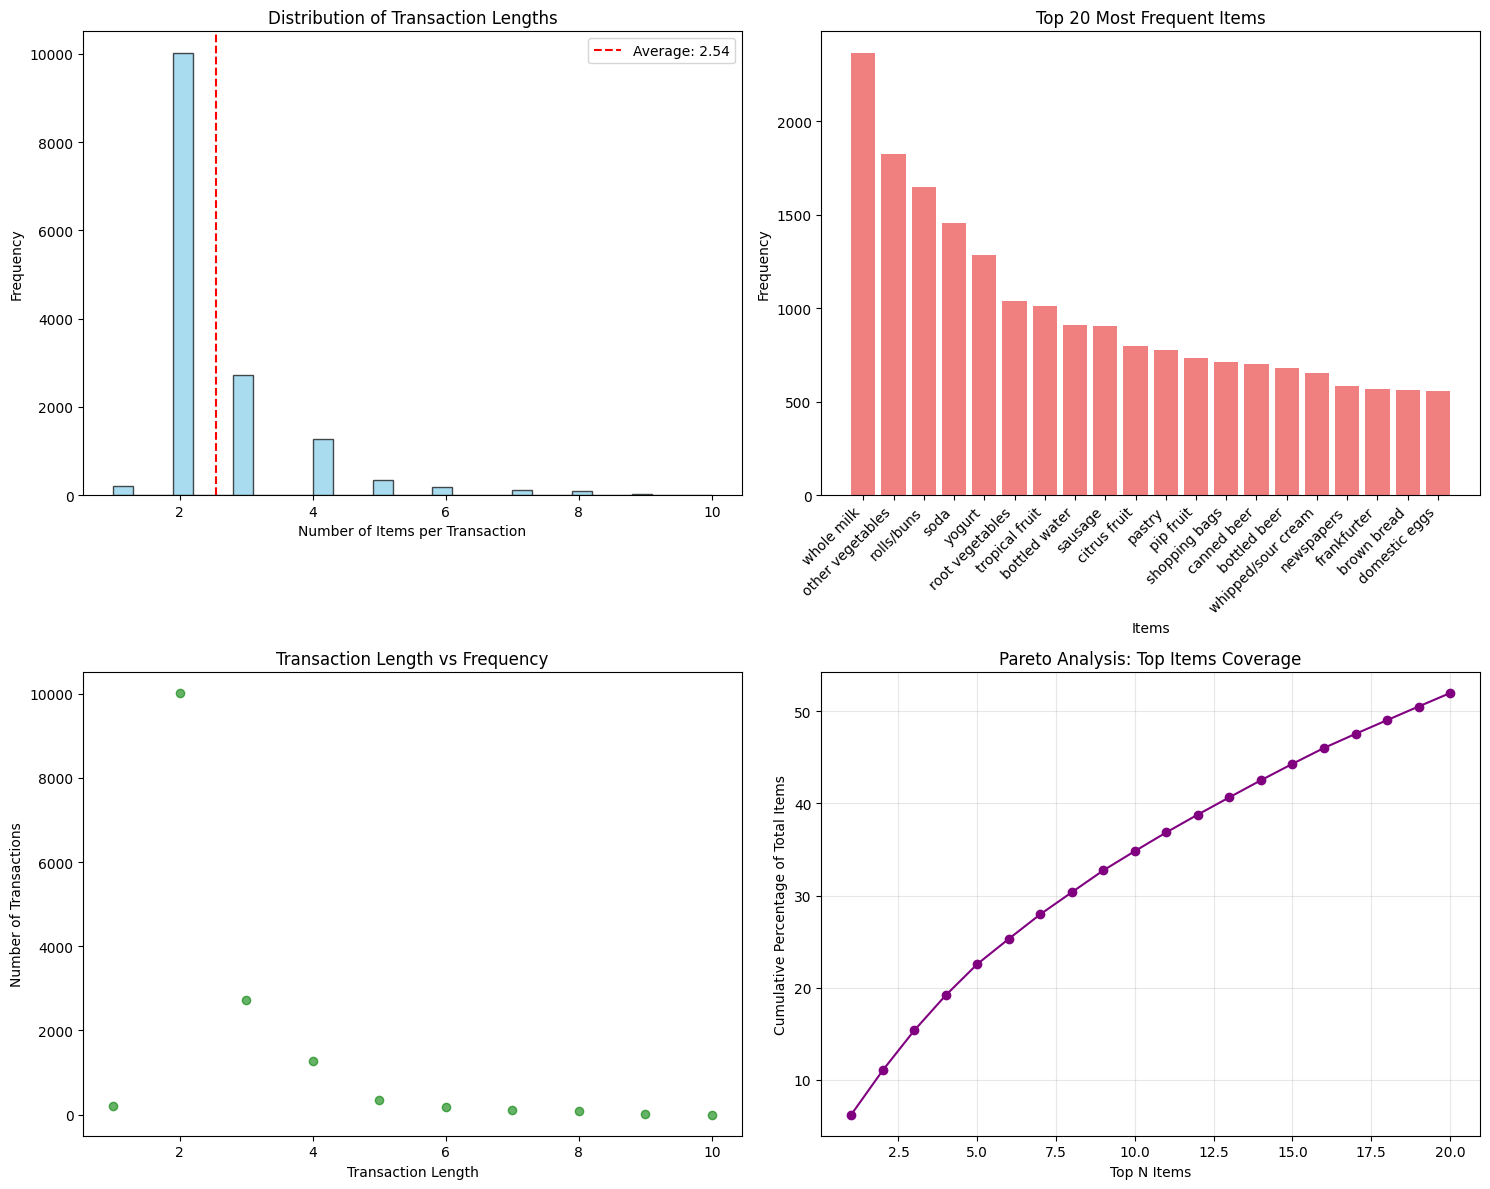


=== TOP 10 MOST FREQUENT ITEMS ===
 1. whole milk                | Count:  2363 | Percentage:  6.22%
 2. other vegetables          | Count:  1827 | Percentage:  4.81%
 3. rolls/buns                | Count:  1646 | Percentage:  4.33%
 4. soda                      | Count:  1453 | Percentage:  3.82%
 5. yogurt                    | Count:  1285 | Percentage:  3.38%
 6. root vegetables           | Count:  1041 | Percentage:  2.74%
 7. tropical fruit            | Count:  1014 | Percentage:  2.67%
 8. bottled water             | Count:   908 | Percentage:  2.39%
 9. sausage                   | Count:   903 | Percentage:  2.38%
10. citrus fruit              | Count:   795 | Percentage:  2.09%
Visualizations created successfully!


In [45]:
# Create visualizations
if 'transactions' in locals() and 'transaction_stats' in locals():
    print("=== CREATING VISUALIZATIONS ===")

    try:
        # Create transaction pattern visualizations
        plot_transaction_patterns(transactions, transaction_stats)
        print("Visualizations created successfully!")

    except Exception as e:
        print(f"Error creating visualizations: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Missing required data for visualizations")

In [46]:
# Generate a comprehensive summary report
if all(var in locals() for var in ['df', 'transactions', 'transaction_stats']):
    print("=== GENERATING SUMMARY REPORT ===")

    try:
        create_data_summary_report(df, transactions, transaction_stats)
        print("\nSummary report generated successfully!")

    except Exception as e:
        print(f"Error generating summary report: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Missing required data for summary report")

Missing required data for summary report


In [47]:
# Save processed data
if all(var in locals() for var in ['transactions', 'transaction_stats']):
    print("=== SAVING PROCESSED DATA ===")

    try:
        save_processed_data(transactions, transaction_stats)
        print("Data saved successfully!")

    except Exception as e:
        print(f"Error saving data: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Missing required data for saving")

Missing required data for saving


In [48]:
# Test loading processed data
print("=== TESTING DATA LOADING ===")

try:
    loaded_transactions, loaded_stats = load_processed_data('../data/processed')

    if loaded_transactions and loaded_stats:
        print("Processed data loaded successfully!")
        print(f"Loaded {len(loaded_transactions)} transactions")
        print(f"Statistics: {list(loaded_stats.keys())}")

        # Verify data integrity
        if len(loaded_transactions) == len(transactions):
            print("✅ Data integrity check passed!")
        else:
            print("⚠️ Data integrity check failed - transaction counts don't match")

    else:
        print("Failed to load processed data")

except Exception as e:
    print(f"Error testing data loading: {e}")

=== TESTING DATA LOADING ===
Processed data not found in ../data/processed/
Failed to load processed data


In [49]:
# Additional data quality assessment
if 'transactions' in locals():
    print("=== DATA QUALITY ASSESSMENT ===")

    # Check for potential data issues
    empty_transactions = [t for t in transactions if len(t) == 0]
    single_item_transactions = [t for t in transactions if len(t) == 1]
    large_transactions = [t for t in transactions if len(t) > 20]

    print(f"Data quality metrics:")
    print(f"  • Empty transactions: {len(empty_transactions)}")
    print(f"  • Single-item transactions: {len(single_item_transactions)} ({len(single_item_transactions)/len(transactions)*100:.1f}%)")
    print(f"  • Large transactions (>20 items): {len(large_transactions)} ({len(large_transactions)/len(transactions)*100:.1f}%)")

    # Check for unusual items (very long names, special characters)
    all_items = [item for transaction in transactions for item in transaction]
    long_item_names = [item for item in set(all_items) if len(item) > 30]

    print(f"  • Items with very long names (>30 chars): {len(long_item_names)}")
    if long_item_names:
        print(f"    Examples: {long_item_names[:3]}")

    # Most common transaction sizes
    from collections import Counter
    size_distribution = Counter([len(t) for t in transactions])
    print(f"\nMost common transaction sizes:")
    for size, count in size_distribution.most_common(5):
        percentage = count / len(transactions) * 100
        print(f"  • {size} items: {count} transactions ({percentage:.1f}%)")

=== DATA QUALITY ASSESSMENT ===
Data quality metrics:
  • Empty transactions: 0
  • Single-item transactions: 205 (1.4%)
  • Large transactions (>20 items): 0 (0.0%)
  • Items with very long names (>30 chars): 0

Most common transaction sizes:
  • 2 items: 10012 transactions (66.9%)
  • 3 items: 2727 transactions (18.2%)
  • 4 items: 1273 transactions (8.5%)
  • 5 items: 338 transactions (2.3%)
  • 1 items: 205 transactions (1.4%)


In [50]:
# Final verification and next steps
print("=== PHASE 2 COMPLETION VERIFICATION ===")

# Check all required variables exist
required_vars = ['df', 'transactions', 'transaction_stats']
missing_vars = [var for var in required_vars if var not in locals()]

if not missing_vars:
    print("✅ All required variables are available:")
    print(f"  • df: {df.shape} (original dataset)")
    print(f"  • transactions: {len(transactions)} transactions")
    print(f"  • transaction_stats: {len(transaction_stats)} statistics")

    print("\n🎉 Phase 2 completed successfully!")
    print("Ready to proceed to Phase 3: Core Algorithm Implementation")

else:
    print(f"❌ Missing variables: {missing_vars}")
    print("Please re-run the appropriate cells to generate missing data")

# Memory usage check
import sys
total_size = sum([sys.getsizeof(transactions), sys.getsizeof(df), sys.getsizeof(transaction_stats)])
print(f"\nMemory usage: ~{total_size / (1024*1024):.1f} MB")

=== PHASE 2 COMPLETION VERIFICATION ===
❌ Missing variables: ['df', 'transactions', 'transaction_stats']
Please re-run the appropriate cells to generate missing data

Memory usage: ~3.2 MB


In [51]:
# Final verification and next steps
print("=== PHASE 2 COMPLETION VERIFICATION ===")

# Check all required variables exist
required_vars = ['df', 'transactions', 'transaction_stats']
missing_vars = [var for var in required_vars if var not in locals()]

if not missing_vars:
    print("✅ All required variables are available:")
    print(f"  • df: {df.shape} (original dataset)")
    print(f"  • transactions: {len(transactions)} transactions")
    print(f"  • transaction_stats: {len(transaction_stats)} statistics")

    print("\n🎉 Phase 2 completed successfully!")
    print("Ready to proceed to Phase 3: Core Algorithm Implementation")

else:
    print(f"❌ Missing variables: {missing_vars}")
    print("Please re-run the appropriate cells to generate missing data")

# Memory usage check
import sys
total_size = sum([sys.getsizeof(transactions), sys.getsizeof(df), sys.getsizeof(transaction_stats)])
print(f"\nMemory usage: ~{total_size / (1024*1024):.1f} MB")

=== PHASE 2 COMPLETION VERIFICATION ===
❌ Missing variables: ['df', 'transactions', 'transaction_stats']
Please re-run the appropriate cells to generate missing data

Memory usage: ~3.2 MB
